<a href="https://colab.research.google.com/github/BecquerF/CoderHouse/blob/master/proyectods_partel_fern_ndez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Introducción

Mi enfoque será sobre datos futbolísticos en el cuál utilizaré un dataset sobre el fútbol Argentino y los resultados en todas las competencias desde la decada del 70´ como registro.
Este dataset fue tomado de Kaggle, https://www.kaggle.com/datasets/estebanmarcelloni/liga-argentina-futbol
Mi enfoque será tratar de comprender las probabilidades de ganar que tienen los equipos cuando son locales, para contemplar la popularidad que tienen cada uno de estos equipos y como influyen en el resultado, dependiendo de los equipos grandes del fútbol Argentino y los no.

Hipótesis 1: A percepción personal, pienso que tienen una gran probabilidad mayor a 60% de que cada club categorizado como de los GRANDES del país, en lograr obtener 3 puntos de forma local y un 25% en perder el partido, dejando un 15% en empate.
Hipótesis 2: River creo que es el equipo con más Victorias, sin conocer de su larga Historia, lo veo reflejo a la capacidad de su estadio, El Monumental es el estadio más grande de Argentina con 84mil (aprox.), lo sigue el Kempes con 57mil y La Bombonera con 54mil. Considerando la influencia del público presente en cada encuentro, a mi entender será River quién tenga mayor partidos ganados de forma local que el resto.

Cuestiones:
Y dejaré como cuestiones a resolver, ¿que tiene más influencia en este deporte: la popularidad, la capacidad del estadio, los logros o lo que sucede dentro del campo de juego? ¿qué sucede cuando se enfrentan entre estos grandes? ¿cuál tiene mayor probabilidad en ganar como local? y ¿qué equipo tiene mayor probabilidad de ganarle a otro grande siendo visitante?

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as pyplot
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Import the missing module
import seaborn as sns


In [4]:
df=pd.read_csv('results.csv')
df


,Unnamed: 0,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id
0,0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0
1,1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1
2,2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7
3,3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0
4,4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7
...,...,...,...,...,...,...,...,...
32849,32849,Nacional 1976 - Grupo C,93,Union,1,0,Velez,94
32850,32850,Metropolitano 1975 - Fecha 36,94,Velez,0,0,Union,93
32851,32851,Metropolitano 1975 - Fecha 17,93,Union,1,0,Velez,94
32852,32852,Metropolitano 1970 - Fecha 16,93,Union,1,1,Velez,94


In [6]:
df["Partido Ganado Local"] = np.where(df['local_result'] > df["visitor_result"], 1, 0)
df["Partido Empatado Local"] = np.where(df["local_result"] == df["visitor_result"], 1, 0)
df["Partido Perdido Local"] = np.where(df["local_result"] < df["visitor_result"], 1, 0)

df["Resultado"] = np.where(df['local_result'] > df['visitor_result'], 'Ganó Local',
                           np.where(df['local_result'] < df['visitor_result'], 'Ganó Visitante', 'Empate'))
df.head()


,Unnamed: 0,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id,Partido Ganado Local,Partido Empatado Local,Partido Perdido Local,Resultado
0,0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0,1,0,0,Ganó Local
1,1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1,1,0,0,Ganó Local
2,2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7,0,1,0,Empate
3,3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0,0,0,1,Ganó Visitante
4,4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7,1,0,0,Ganó Local


In [7]:
df.rename(columns={'local_result': 'Goles Local', 'visitor_result': 'Goles Visita'}, inplace=True)
df_tabla_de_valores = df[['local_team','visitor_team','Partido Ganado Local', 'Partido Empatado Local', 'Partido Perdido Local', 'Goles Local', 'Goles Visita','Resultado']]
df_tabla_de_valores

,local_team,visitor_team,Partido Ganado Local,Partido Empatado Local,Partido Perdido Local,Goles Local,Goles Visita,Resultado
0,All Boys,Aldosivi,1,0,0,2,0,Ganó Local
1,Aldosivi,All Boys,1,0,0,4,0,Ganó Local
2,Aldosivi,Argentinos,0,1,0,0,0,Empate
3,Argentinos,Aldosivi,0,0,1,1,2,Ganó Visitante
4,Aldosivi,Argentinos,1,0,0,3,2,Ganó Local
...,...,...,...,...,...,...,...,...
32849,Union,Velez,1,0,0,1,0,Ganó Local
32850,Velez,Union,0,1,0,0,0,Empate
32851,Union,Velez,1,0,0,1,0,Ganó Local
32852,Union,Velez,0,1,0,1,1,Empate


In [8]:
#Ahora quiero extraer únicamente los nombre de todos los equipos que participan en el df results.csv
equipos = df['local_team'].unique()
equipos = np.append(equipos, df['visitor_team'].unique())
equipos = np.unique(equipos)

# Crear un nuevo DataFrame para almacenar los equipos
df_equipos = pd.DataFrame(equipos, columns=['Equipo'])

# Inicializar las columnas con valores de 0
df_equipos['Partidos Ganados de Local'] = 0
df_equipos['Partidos Empatados de Local'] = 0
df_equipos['Partidos Perdidos de Local'] = 0

# Iterar sobre cada equipo y calcular los valores
for equipo in df_equipos['Equipo']:
    # Partidos ganados como local
    ganados_local = df_tabla_de_valores[(df_tabla_de_valores['local_team'] == equipo) &
                                        (df_tabla_de_valores['Partido Ganado Local'] == 1)].shape[0]

    # Partidos empatados como local
    empatados_local = df_tabla_de_valores[(df_tabla_de_valores['local_team'] == equipo) &
                                          (df_tabla_de_valores['Partido Empatado Local'] == 1)].shape[0]

    # Partidos perdidos como local
    perdidos_local = df_tabla_de_valores[(df_tabla_de_valores['local_team'] == equipo) &
                                         (df_tabla_de_valores['Partido Perdido Local'] == 1)].shape[0]

    # Asignar estos valores al DataFrame df_equipos
    df_equipos.loc[df_equipos['Equipo'] == equipo, 'Partidos Ganados de Local'] = ganados_local
    df_equipos.loc[df_equipos['Equipo'] == equipo, 'Partidos Empatados de Local'] = empatados_local
    df_equipos.loc[df_equipos['Equipo'] == equipo, 'Partidos Perdidos de Local'] = perdidos_local


# Mostrar el DataFrame resultante
df_equipos


,Equipo,Partidos Ganados de Local,Partidos Empatados de Local,Partidos Perdidos de Local
0,Aldosivi,30,25,34
1,All Boys,92,88,78
2,Almagro,24,22,27
3,Altos Hornos Zapla,11,13,12
4,Alvarado,1,2,4
...,...,...,...,...
90,Temperley,72,72,73
91,Tigre,237,141,215
92,Tiro Federal (R),3,5,11
93,Union,295,240,150


In [9]:
df_equipos.to_csv('df_equipos.csv', index=False)


In [10]:
pd.read_csv('df_equipos.csv')
df_equipos.sort_values(by='Partidos Ganados de Local', ascending=False)

#Top 30 equipos
top_50_equipos = df_equipos.sort_values(by='Partidos Ganados de Local', ascending=False).head(50)
top_50_equipos

,Equipo,Partidos Ganados de Local,Partidos Empatados de Local,Partidos Perdidos de Local
75,River Plate,1022,382,247
17,Boca Juniors,1005,385,268
77,San Lorenzo,868,431,326
56,Independiente,867,433,330
37,Estudiantes (LP),821,424,353
94,Velez,818,427,352
73,Racing Club,814,444,329
66,Newells,728,450,289
76,Rosario Central,676,421,299
48,Huracan,643,364,380


In [11]:
#Crear nuevas columnas que mencione el % de Partidos ganados, empatados y perdidos de forma local
top_50_equipos['% Ganados de Local'] = top_50_equipos['Partidos Ganados de Local'] / (top_50_equipos['Partidos Ganados de Local'] + top_50_equipos['Partidos Empatados de Local'] + top_50_equipos['Partidos Perdidos de Local']) * 100
top_50_equipos['% Empatados de Local'] = top_50_equipos['Partidos Empatados de Local'] / (top_50_equipos['Partidos Ganados de Local'] + top_50_equipos  ['Partidos Empatados de Local'] + top_50_equipos['Partidos Perdidos de Local']) * 100
top_50_equipos['% Perdidos de Local'] = top_50_equipos['Partidos Perdidos de Local']   / (top_50_equipos['Partidos Ganados de Local'] + top_50_equipos['Partidos Empatados de Local'] + top_50_equipos['Partidos Perdidos de Local']) * 100
top_50_equipos['% Ganados de Local'] = top_50_equipos['% Ganados de Local'].round(2)
top_50_equipos['% Empatados de Local'] = top_50_equipos['% Empatados de Local'].round(2)
top_50_equipos['% Perdidos de Local'] = top_50_equipos['% Perdidos de Local'].round(2)
top_50_equipos

,Equipo,Partidos Ganados de Local,Partidos Empatados de Local,Partidos Perdidos de Local,% Ganados de Local,% Empatados de Local,% Perdidos de Local
75,River Plate,1022,382,247,61.90,23.14,14.96
17,Boca Juniors,1005,385,268,60.62,23.22,16.16
77,San Lorenzo,868,431,326,53.42,26.52,20.06
56,Independiente,867,433,330,53.19,26.56,20.25
37,Estudiantes (LP),821,424,353,51.38,26.53,22.09
94,Velez,818,427,352,51.22,26.74,22.04
73,Racing Club,814,444,329,51.29,27.98,20.73
66,Newells,728,450,289,49.63,30.67,19.70
76,Rosario Central,676,421,299,48.42,30.16,21.42
48,Huracan,643,364,380,46.36,26.24,27.40


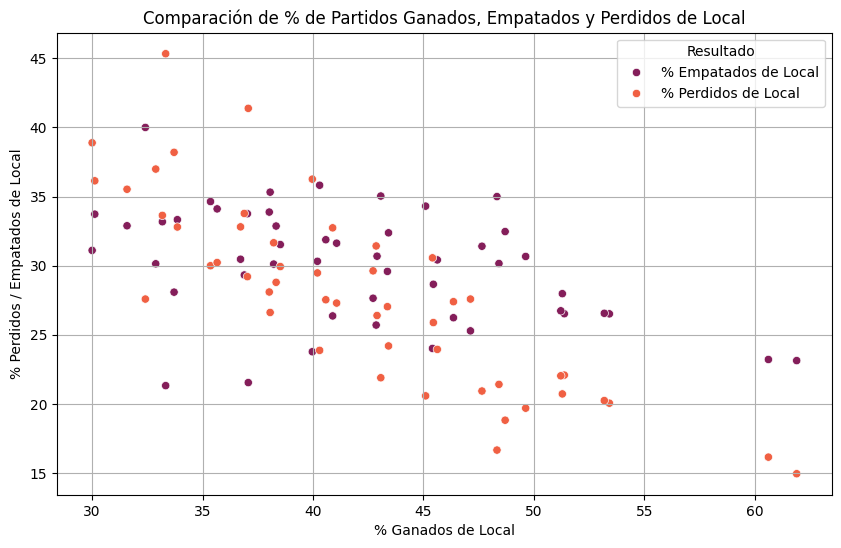

In [12]:
# Crear un DataFrame largo para facilitar la creación del gráfico
df_melted = top_50_equipos.melt(id_vars=['% Ganados de Local'],
                                value_vars=['% Empatados de Local', '% Perdidos de Local'],
                                var_name='Resultado',
                                value_name='Porcentaje')

# Crear el scatter plot usando matplotb
plt.figure(figsize=(10, 6))
plt.xlabel('% Ganados de Local')
plt.ylabel('Porcentaje')
sns.scatterplot(data=df_melted, x='% Ganados de Local', y='Porcentaje', hue='Resultado', palette='rocket')


# Etiquetas y título
plt.title('Comparación de % de Partidos Ganados, Empatados y Perdidos de Local')
plt.xlabel('% Ganados de Local')
plt.ylabel('% Perdidos / Empatados de Local')

# Mostrar el gráfico
plt.grid(True)
plt.show()


<ipython-input-13-25e9674c81e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Equipo', y='% Ganados de Local', data=df_grafico_barras, palette='rocket')


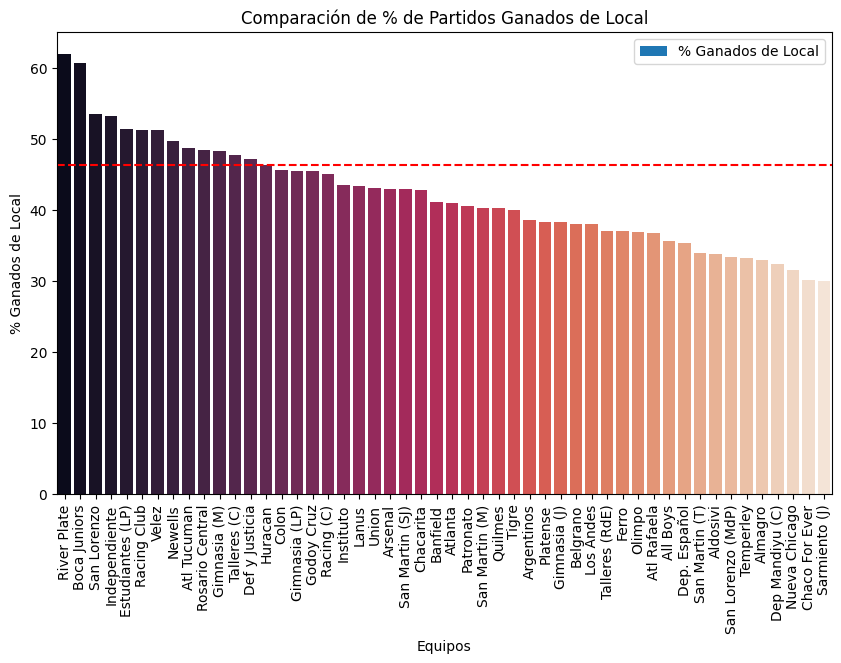

In [13]:
#Crearé un gráfico de barras para comparar % Ganados de Local
df_grafico_barras = top_50_equipos.sort_values(by='% Ganados de Local', ascending=False).head(50)
df_grafico_barras = df_grafico_barras[['Equipo', '% Ganados de Local', 'Partidos Ganados de Local']]
df_grafico_barras = df_grafico_barras.sort_values(by='% Ganados de Local', ascending=False)
df_grafico_barras.plot(x='Equipo', y='% Ganados de Local', kind='bar', figsize=(10, 6))
sns.barplot(x='Equipo', y='% Ganados de Local', data=df_grafico_barras, palette='rocket')
plt.axhline(y=46.3, color='red', linestyle='--', label='Promedio (46.3%)')
plt.title('Comparación de % de Partidos Ganados de Local')
plt.xlabel('Equipos')
plt.ylabel('% Ganados de Local')
plt.savefig('grafico_barras_ganados_local.png')
plt.show()


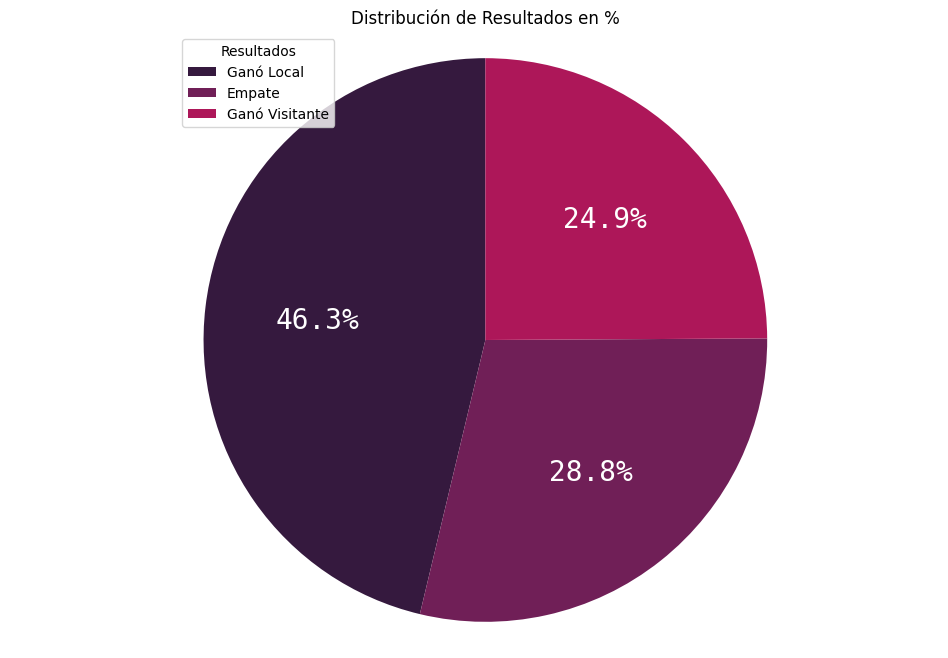

In [34]:
#Crear un Piechart para los Resultados "Ganó Local, Empate, Ganó Visita"
df_grafico_res = df['Resultado'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df_grafico_res, labels=df_grafico_res.index, textprops={'color':'white', 'fontsize': 20, 'fontfamily': 'monospace'}, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rocket'))
plt.title('Distribución de Resultados en %')
plt.axis('equal')
plt.legend(title='Resultados', loc='upper left', labels=df_grafico_res.index)
#guardar imagen
plt.savefig('piechart_resultados.png')
plt.show()


##Hipótesis 1:
Una de mis hipótesis es el porcentaje en Victoria de local, empate o derrota de forma local: 60%, 15% y 25% respectivamente. Lo cuál en esta gráfica solo podemos hablar de forma generalizada, próximo paso será reducir la lista de los equipos de este dataset (94 equipos) a 7 equipos, lo cuál considero son los más importantes del Fútbol Argentino, y desde allí resolveré en este mismo gráfico cuánto es el promedio de estos equipos categorizados GRANDES con respecto a esta hipótesis.

In [37]:
#Mostrar del DF inicial, resultados de los 7 equipos de top_50_equipos

df_resultado_7_equipos = df[df['local_team'].isin(top_50_equipos.head(7)['Equipo'])]
df_resultado_7_equipos = df_resultado_7_equipos[[ 'local_team', 'visitor_team', 'Partido Ganado Local', 'Partido Empatado Local', 'Partido Perdido Local', 'Goles Local', 'Goles Visita', 'Resultado']]
df_resultado_7_equipos = df_resultado_7_equipos.sort_values(by='Partido Ganado Local', ascending=False)

df_resultado_7_equipos

,local_team,visitor_team,Partido Ganado Local,Partido Empatado Local,Partido Perdido Local,Goles Local,Goles Visita,Resultado
29,Boca Juniors,Aldosivi,1,0,0,2,0,Ganó Local
20708,River Plate,Gimnasia (LP),1,0,0,2,0,Ganó Local
20704,River Plate,Gimnasia (LP),1,0,0,2,0,Ganó Local
20702,River Plate,Gimnasia (LP),1,0,0,1,0,Ganó Local
20701,River Plate,Gimnasia (LP),1,0,0,2,1,Ganó Local
...,...,...,...,...,...,...,...,...
9728,Boca Juniors,Newells,0,1,0,2,2,Empate
22529,Racing Club,Huracan,0,0,1,1,3,Ganó Visitante
22524,Racing Club,Huracan,0,1,0,0,0,Empate
22517,Racing Club,Huracan,0,1,0,2,2,Empate


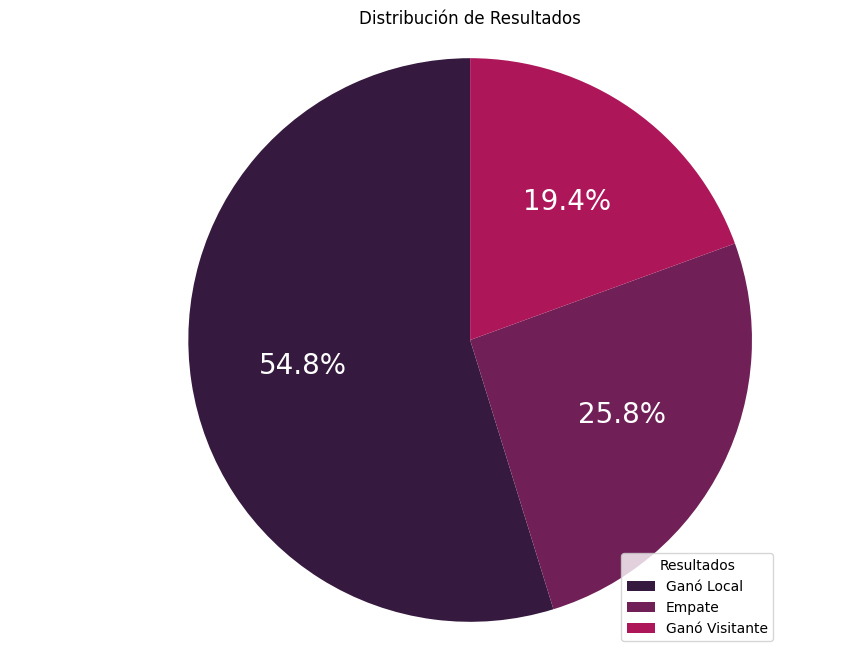

In [41]:
df_grafico_7 = df_resultado_7_equipos['Resultado'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df_grafico_7, labels=df_grafico_7.index, textprops={'color':'white','fontsize': 20}, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rocket'))
plt.title('Distribución de Resultados')
plt.axis('equal')
plt.legend(title='Resultados', loc='lower right', labels=df_grafico_7.index)
plt.savefig('piechart_resultados_7.png')
plt.show()

##Respuesta Hipótesis 1

Con este nuevo DF sobre los 7 equipos GRANDES o importantes del Fútbol Argentino, me acerco a mi apreciación, siendo de esta manera más exactos.
Un 54.8% es el porcentaje en que logran la victoria de forma local, el cuál estuve 5.2% por encima con mi percepción.
Un 25.8% en empates, 10.8% por encima de mi hipótesis.
Y un 19.4% de derrota como local, 5.6% por debajo de mi apreciación.

Pero si continúo la comparación con el grosor de este dataset como lo eran los 94 equipos y todos los encuentros, los equipos GRANDES obtienen resultados positivos siendo locales, lo cuál influye de buena manera todo el entorno ajustandose en resultados y Victorias. Esto es una apreciación CUALITATIVA, ya que se ve favorecido todos los equipos siendo locales, pero los equipos con Mayor cantidad de hinchada presente en su estadio, contribuye a la victoria de su club.

In [43]:
#Compararé % de Equipos con el promedio en el cuál gana un 46.3% los partidos siendo Locales

# Definir el promedio de partidos ganados de local
promedio_ganados_local = 46.3

# Crear una nueva columna para la diferencia en puntos porcentuales
top_50_equipos['Diferencia Puntos Porcentuales'] = top_50_equipos['% Ganados de Local'] - promedio_ganados_local

# Redondear la nueva columna a dos decimales
top_50_equipos['Diferencia Puntos Porcentuales'] = top_50_equipos['Diferencia Puntos Porcentuales'].round(2)

#Ordenar el DataFrame por 'Diferencia Puntos Porcentuales'
top_50_equipos = top_50_equipos.sort_values(by='Diferencia Puntos Porcentuales', ascending=False)

#Guardar .csv
top_50_equipos.to_csv('top_50_equipos.csv', index=False)

# Mostrar el DataFrame actualizado
print(top_50_equipos[['Equipo', '% Ganados de Local', 'Diferencia Puntos Porcentuales']])


               Equipo  % Ganados de Local  Diferencia Puntos Porcentuales
75        River Plate               61.90                           15.60
17       Boca Juniors               60.62                           14.32
77        San Lorenzo               53.42                            7.12
56      Independiente               53.19                            6.89
37   Estudiantes (LP)               51.38                            5.08
73        Racing Club               51.29                            4.99
94              Velez               51.22                            4.92
66            Newells               49.63                            3.33
11        Atl Tucuman               48.70                            2.40
76    Rosario Central               48.42                            2.12
44       Gimnasia (M)               48.33                            2.03
88       Talleres (C)               47.65                            1.35
27     Def y Justicia               47

<ipython-input-44-95383ff52d80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Diferencia Puntos Porcentuales', y='Equipo', data=top_50_equipos, size=8, palette='rocket')


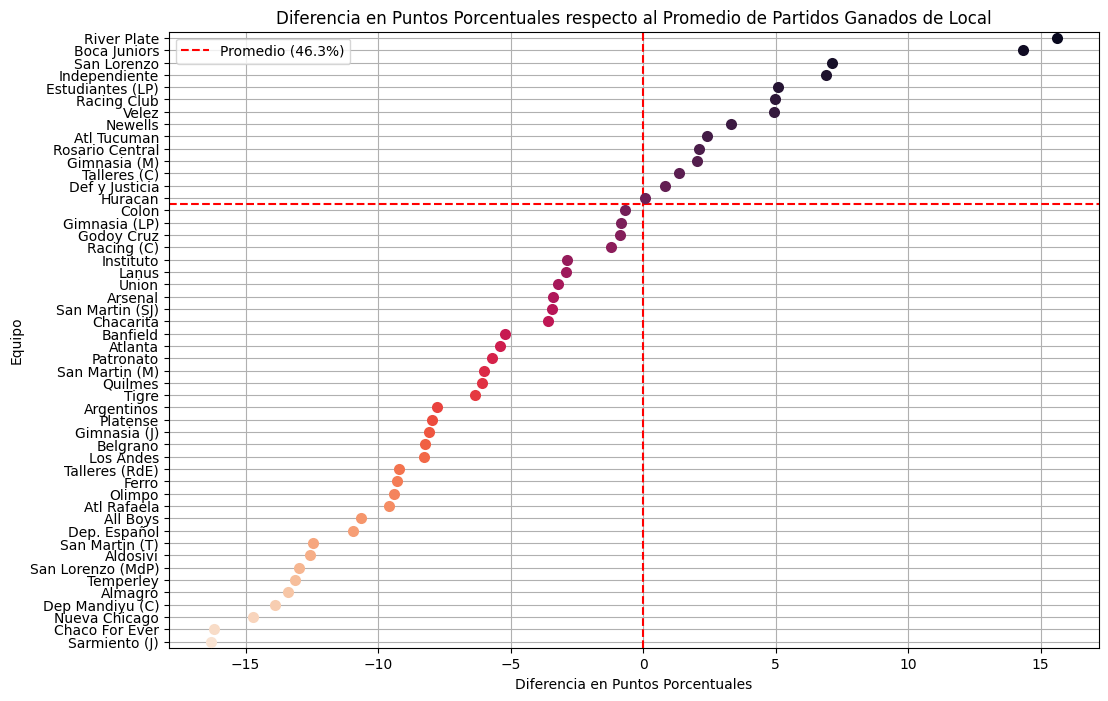

In [44]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Diferencia Puntos Porcentuales', y='Equipo', data=top_50_equipos, size=8, palette='rocket')

# Añado la línea "Promedio" para resaltar quiénes superan el promedio y quienes no
plt.axvline(0, color='red', linestyle='--', label='Promedio (46.3%)')
plt.axhline(y=13.5, color='red', linestyle='--')

plt.title('Diferencia en Puntos Porcentuales respecto al Promedio de Partidos Ganados de Local')
plt.xlabel('Diferencia en Puntos Porcentuales')
plt.ylabel('Equipo')
plt.legend()
plt.grid(True)
plt.show()


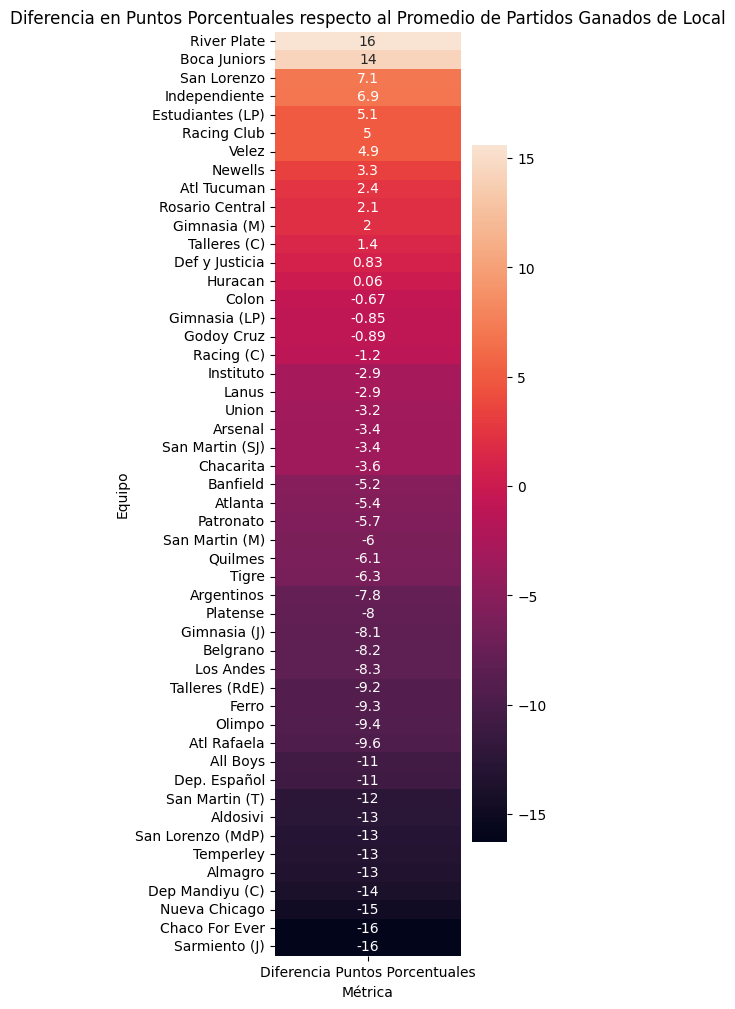

In [51]:
plt.figure(figsize=(3, 12))
sns.heatmap(top_50_equipos.set_index('Equipo')[['Diferencia Puntos Porcentuales']], annot=True, cmap='rocket', center=0)

plt.title('Diferencia en Puntos Porcentuales respecto al Promedio de Partidos Ganados de Local')
plt.xlabel('Métrica')
plt.ylabel('Equipo')
plt.show()


##Hipótesis 2

Podemos decir que está más que claro el poderío de cada equipo IMPORTANTE del fútbol argentino y la obtención de puntos que contribuyen en la campaña año tras año, pero destacar el entorno lo cuál se diferencian con el resto de los equipos con menos popularidad.

Mi paso siguiente es evaluar que sucede en resultados cuando estos equipos se cruzan entre sí.

In [52]:
# Equipos seleccionados
equipos_seleccionados = top_50_equipos.head(7)['Equipo']

# Filtrar partidos donde ambos equipos están en el grupo de 7 seleccionados
df_resultado_7_equipos_filtrado = df_resultado_7_equipos[
    df_resultado_7_equipos['local_team'].isin(equipos_seleccionados) &
    df_resultado_7_equipos['visitor_team'].isin(equipos_seleccionados)
]

# Ordenar por partidos ganados de local
df_resultado_7_equipos_filtrado = df_resultado_7_equipos_filtrado.sort_values(by='Partido Ganado Local', ascending=False)
df_resultado_7_equipos_filtrado = df_resultado_7_equipos_filtrado.to_csv('df_resultado_7_equipos_filtrado.csv', index=False)
# Mostrar el resultado
print(df_resultado_7_equipos_filtrado)


None


In [53]:
df_resultado_7_equipos_filtrado = pd.read_csv('df_resultado_7_equipos_filtrado.csv')
df_resultado_7_equipos_filtrado = df_resultado_7_equipos_filtrado.value_counts()
print(df_resultado_7_equipos_filtrado)

local_team        visitor_team      Partido Ganado Local  Partido Empatado Local  Partido Perdido Local  Goles Local  Goles Visita  Resultado 
Independiente     Boca Juniors      0                     1                       0                      1            1             Empate        22
Estudiantes (LP)  Velez             0                     1                       0                      1            1             Empate        18
San Lorenzo       River Plate       0                     1                       0                      1            1             Empate        17
Independiente     Estudiantes (LP)  0                     1                       0                      0            0             Empate        16
Velez             Racing Club       0                     1                       0                      1            1             Empate        16
                                                                                                                

In [54]:
# Read the CSV file
df_resultado_7_equipos_filtrado = pd.read_csv('df_resultado_7_equipos_filtrado.csv')

# Agrupar los datos por equipo local y visitante
df_cruces_local = df_resultado_7_equipos_filtrado.groupby(['local_team', 'visitor_team']).agg(
    Partido_Ganado_Local=('Partido Ganado Local', 'sum'),
    Partido_Empatado_Local=('Partido Empatado Local', 'sum'),
    Partido_Perdido_Local=('Partido Perdido Local', 'sum'),
    Goles_Local=('Goles Local', 'sum'),
    Goles_Visita=('Goles Visita', 'sum')
).reset_index()

# Crear una nueva columna 'Cruce Detallado' que une 'local_team' y 'visitor_team' con " vs "
df_cruces_local['Cruce Detallado'] = df_cruces_local['local_team'] + ' vs ' + df_cruces_local['visitor_team']

# Reordenar las columnas para una mejor visualización
df_cruces_local = df_cruces_local[['local_team', 'Cruce Detallado', 'Partido_Ganado_Local', 'Partido_Empatado_Local', 'Partido_Perdido_Local', 'Goles_Local', 'Goles_Visita']]

# Ordenar los datos por equipo local
df_cruces_local = df_cruces_local.sort_values(by='local_team', ascending=True)

# Guardar el DataFrame en un archivo CSV
df_cruces_local.to_csv('df_cruces_local.csv', index=False)

# Mostrar el resultado
df_cruces_local


,local_team,Cruce Detallado,Partido_Ganado_Local,Partido_Empatado_Local,Partido_Perdido_Local,Goles_Local,Goles_Visita
0,Boca Juniors,Boca Juniors vs Estudiantes (LP),62,21,9,171,70
1,Boca Juniors,Boca Juniors vs Independiente,42,23,25,140,107
2,Boca Juniors,Boca Juniors vs Racing Club,43,24,18,159,93
3,Boca Juniors,Boca Juniors vs River Plate,45,29,27,145,112
4,Boca Juniors,Boca Juniors vs San Lorenzo,37,24,32,138,124
5,Boca Juniors,Boca Juniors vs Velez,55,17,14,183,92
11,Estudiantes (LP),Estudiantes (LP) vs Velez,34,25,22,132,97
9,Estudiantes (LP),Estudiantes (LP) vs River Plate,26,22,34,96,128
10,Estudiantes (LP),Estudiantes (LP) vs San Lorenzo,31,25,30,116,114
7,Estudiantes (LP),Estudiantes (LP) vs Independiente,31,26,29,121,113


In [ ]:
#Colores por equipo
colores_equipo = { 'Boca Juniors':'#f1c40f',
                  'Estudiantes (LP)':'#e74c3c',
                   'Independiente':'#FF0000',
                   'Racing Club':'#2196f3',
                   'River Plate':'#fafafa',
                   'San Lorenzo':'#303f9f',
                   'Velez':'#000066'}
print(df_cruces_local.columns)


Index(['local_team', 'Cruce Detallado', 'Partido_Ganado_Local',
       'Partido_Empatado_Local', 'Partido_Perdido_Local', 'Goles_Local',
       'Goles_Visita'],
      dtype='object')


In [ ]:
#Porcentaje de Victoria, Empate y Derrota como Locales
df_cruces_local['Total_Partidos'] = df_cruces_local['Partido_Ganado_Local'] + df_cruces_local['Partido_Empatado_Local'] + df_cruces_local['Partido_Perdido_Local']
df_cruces_local['Porcentaje_Victoria'] = (df_cruces_local['Partido_Ganado_Local'] / df_cruces_local['Total_Partidos']) * 100
df_cruces_local['Porcentaje_Empate'] = (df_cruces_local['Partido_Empatado_Local'] / df_cruces_local['Total_Partidos']) * 100
df_cruces_local['Porcentaje_Derrota'] = (df_cruces_local['Partido_Perdido_Local'] / df_cruces_local['Total_Partidos']) * 100
df_cruces_local = df_cruces_local.sort_values(by='Porcentaje_Victoria', ascending=False)
df_cruces_local = df_cruces_local.round(2)
df_cruces_local.to_csv('df_cruces_local_porcentaje.csv', index=False)
print(df_cruces_local)

          local_team                    Cruce Detallado  Partido_Ganado_Local  \
25       River Plate    River Plate vs Estudiantes (LP)                    59   
0       Boca Juniors   Boca Juniors vs Estudiantes (LP)                    62   
5       Boca Juniors              Boca Juniors vs Velez                    55   
26       River Plate       River Plate vs Independiente                    53   
27       River Plate         River Plate vs Racing Club                    51   
29       River Plate               River Plate vs Velez                    50   
35       San Lorenzo               San Lorenzo vs Velez                    47   
28       River Plate         River Plate vs San Lorenzo                    49   
2       Boca Juniors        Boca Juniors vs Racing Club                    43   
8   Estudiantes (LP)    Estudiantes (LP) vs Racing Club                    43   
22       Racing Club         Racing Club vs San Lorenzo                    42   
19       Racing Club    Raci

<ipython-input-30-3ad4d0fe45f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='local_team', y='Porcentaje_Victoria', data=df_cruces_local, palette=colores_equipo, edgecolor='black')


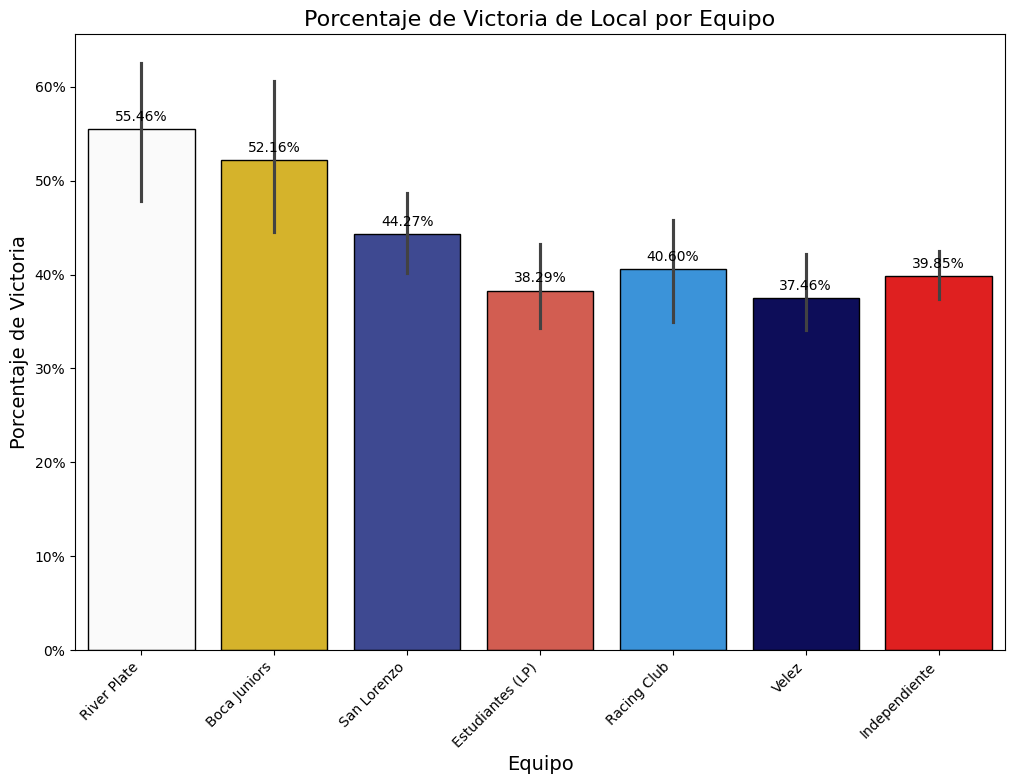

In [ ]:


#Gráfico con Taza de Victoria
plt.figure(figsize=(12, 8))
df_cruces_local = df_cruces_local.sort_values(by='Porcentaje_Victoria', ascending=False)
ax = sns.barplot(x='local_team', y='Porcentaje_Victoria', data=df_cruces_local, palette=colores_equipo, edgecolor='black')

# Etiquetas y título
plt.title('Porcentaje de Victoria de Local por Equipo', fontsize=16)
plt.xlabel('Equipo', fontsize=14)
plt.ylabel('Porcentaje de Victoria', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Format y-axis labels as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Mostrar la gráfica
plt.show()


<ipython-input-31-b505214dd816>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='local_team', y='Porcentaje_Derrota', data=df_cruces_local, palette=colores_equipo, edgecolor='black')


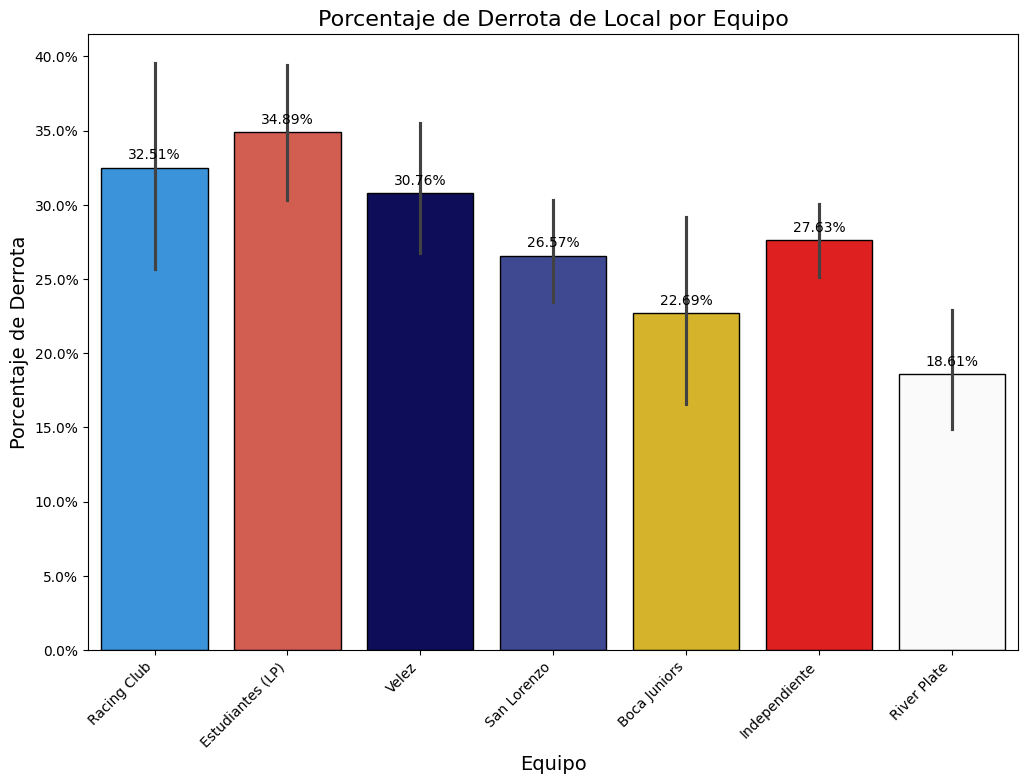

In [ ]:
#Gráfico con Taza de Victoria
plt.figure(figsize=(12, 8))
df_cruces_local = df_cruces_local.sort_values(by='Porcentaje_Derrota', ascending=False)
ax = sns.barplot(x='local_team', y='Porcentaje_Derrota', data=df_cruces_local, palette=colores_equipo, edgecolor='black')

# Etiquetas y título
plt.title('Porcentaje de Derrota de Local por Equipo', fontsize=16)
plt.xlabel('Equipo', fontsize=14)
plt.ylabel('Porcentaje de Derrota', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Format y-axis labels as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Mostrar la gráfica
plt.show()

##Respuesta Hipótesis 2

En este gráfico podemos encontrar que mi hipótesis se acerca a una realidad que la popularidad y capacidad del estadio de River tiene una influencia consecuente en sus resultados.
Siendo el equipo que más ha ganado de local contra los equipos GRANDES. Y el que menos partidos perdidos de Local ha conseguido.
Por lo tanto podemos decir que es un equipo que aprovecha su localía y se hace fuerte.

##Probabilidad en Ganar, Empatar o Perder de Local

En este siguiente desarrollo de mi investigación sobre los resultados en el Fútbol Argentino, me enfocaré en resolver que probabilidad tienen en ganar, empatar o perder dependiendo del resultado, es decir ¿Que probable sea que gane el partido sí el equipo Local solo convierte un gol? Y dar información de este dato para concretar que cantidad de Goles del Local se deben realizar para asegurar una Victoria.

Aplicaré gráficos de Árbol para poder visualizar estas condiciones.

In [ ]:
# Utilizaré nuevamente el DF 'df_tabla_de_valores' para encontrar una probabilidad en la victoria de Local con respecto a los goles convertidos y recibidos

# Contar las ocurrencias de cada resultado para cada cantidad de goles locales
df_goles = df_tabla_de_valores.groupby(['Goles Local', 'Resultado']).size().unstack(fill_value=0)

# Calcular el número total de partidos para cada cantidad de goles locales
df_goles['Total_Partidos'] = df_goles.sum(axis=1)

# Calcular las probabilidades
df_goles['Probabilidad_Ganó_Local'] = (df_goles['Ganó Local'] / df_goles['Total_Partidos']).round(3)
df_goles['Probabilidad_Empate'] = (df_goles['Empate'] / df_goles['Total_Partidos']).round(3)
df_goles['Probabilidad_Ganó_Visitante'] = (df_goles['Ganó Visitante'] / df_goles['Total_Partidos']).round(3)

df_goles.to_csv('df_goles.csv', index=False)
df_goles

Resultado,Empate,Ganó Local,Ganó Visitante,Total_Partidos,Probabilidad_Ganó_Local,Probabilidad_Empate,Probabilidad_Ganó_Visitante
Goles Local,,,,,,,
0,2975,0,3993,6968,0.000,0.427,0.573
1,4256,3252,3083,10591,0.307,0.402,0.291
2,1770,5014,924,7708,0.650,0.230,0.120
3,390,3738,168,4296,0.870,0.091,0.039
4,69,1868,16,1953,0.956,0.035,0.008
5,8,820,0,828,0.990,0.010,0.000
6,2,327,0,329,0.994,0.006,0.000
7,0,116,0,116,1.000,0.000,0.000
8,0,43,0,43,1.000,0.000,0.000


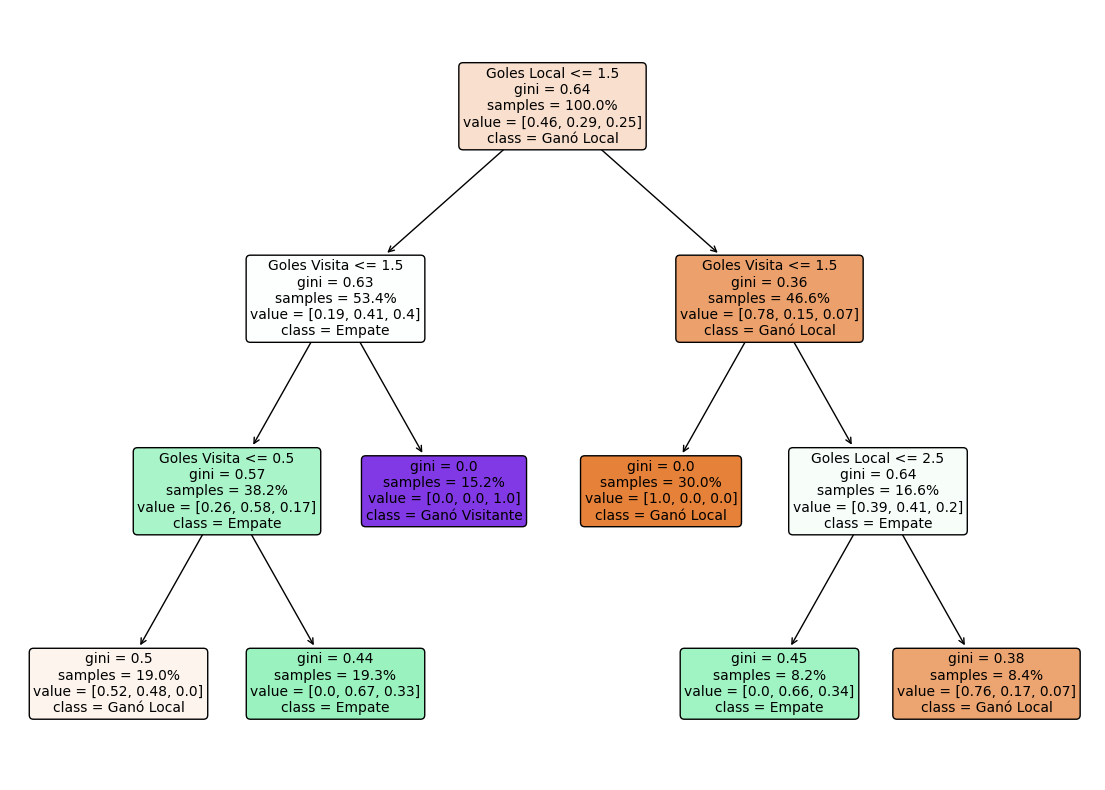

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Definir las características (X) y el objetivo (y)
X = df[['Goles Local', 'Goles Visita']]
y = df['Resultado']

# Codificar el objetivo (y) en valores numéricos
y = y.map({'Ganó Local': 0, 'Empate': 1, 'Ganó Visitante': 2})

# Crear y entrenar el árbol de decisión
clf = DecisionTreeClassifier(max_depth=3)  # Limitar la profundidad del árbol
clf.fit(X, y)

# Visualizar el árbol con información adicional
plt.figure(figsize=(14,10))
tree.plot_tree(clf,
               feature_names=['Goles Local', 'Goles Visita'],
               class_names=['Ganó Local', 'Empate', 'Ganó Visitante'],
               filled=True,
               rounded=True,
               proportion=True,  # Muestra las proporciones de las clases
               precision=2,      # Ajusta la precisión decimal
               fontsize=10)

plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Regresión Logística
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Hacer predicciones
y_pred = logreg.predict(X_test)

# Evaluar el modelo
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4500
           1       1.00      1.00      1.00      2861
           2       1.00      1.00      1.00      2496

    accuracy                           1.00      9857
   macro avg       1.00      1.00      1.00      9857
weighted avg       1.00      1.00      1.00      9857

Confusion Matrix:
 [[4500    0    0]
 [   0 2861    0]
 [   0    0 2496]]
